In [ ]:
"""
The tqdm library in Python is used to show progress bars for loops — super handy
for tracking long-running operations like file processing, data loading, or model training.


"""


# !rm -rf /kaggle/working/*  ---> this for clearing the output



In [4]:
import random
import numpy as np
import tensorflow as tf

SEED = 42 

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


In [5]:
print("✅ GPU Available:", tf.config.list_physical_devices('GPU'))

✅ GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


### **Calculate some Features From Videos**

In [6]:
import os
import cv2
import pandas as pd
from tqdm import tqdm
import glob

# Your dataset path
data_dir = '/kaggle/input/human-activity-recognition-video-dataset/Human Activity Recognition - Video Dataset'

# Collect all class folders
class_folders = [os.path.join(data_dir, c) for c in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, c))]

# List to store all video info
video_info = []

# Loop through each class folder
for class_path in class_folders:
    class_name = os.path.basename(class_path)
    print(f"Processing class: {class_name}")

    # Get all video files (supports mp4, avi, mov, mkv, etc.)
    video_files = []
    for ext in ('*.mp4', '*.avi', '*.mov', '*.mkv'):
        video_files.extend(glob.glob(os.path.join(class_path, ext)))

    for video_path in tqdm(video_files, desc=f"Reading {class_name}"):
        try:
            cap = cv2.VideoCapture(video_path)

            if not cap.isOpened():
                print(f"⚠️ Could not open {video_path}")
                continue

            # Extract metadata
            fps = cap.get(cv2.CAP_PROP_FPS)
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            duration = total_frames / fps if fps > 0 else 0

            # Append information
            video_info.append({
                'class': class_name,
                'video_name': os.path.basename(video_path),
                'path': video_path,
                'fps': round(fps, 2),
                'total_frames': total_frames,
                'duration_sec': round(duration, 2),
                'resolution': f"{width}x{height}",
                'width': width,
                'height': height
            })

            cap.release()
        except Exception as e:
            print(f"Error processing {video_path}: {e}")

# Convert to DataFrame
df = pd.DataFrame(video_info)


Processing class: Sitting


Reading Sitting: 100%|██████████| 156/156 [00:19<00:00,  8.06it/s]


Processing class: Walking While Reading Book


Reading Walking While Reading Book: 100%|██████████| 176/176 [00:03<00:00, 56.79it/s]


Processing class: Walking


Reading Walking: 100%|██████████| 171/171 [00:03<00:00, 46.54it/s]


Processing class: Standing Still


Reading Standing Still: 100%|██████████| 174/174 [00:22<00:00,  7.71it/s]


Processing class: Clapping


Reading Clapping: 100%|██████████| 146/146 [00:02<00:00, 65.31it/s]


Processing class: Walking While Using Phone


Reading Walking While Using Phone: 100%|██████████| 143/143 [00:13<00:00, 10.32it/s]


Processing class: Meet and Split


Reading Meet and Split: 100%|██████████| 147/147 [00:03<00:00, 44.92it/s]


In [7]:

# Basic overview
print("\n--- Dataset Overview ---")
print(f"Total videos: {len(df)}")
print(df.groupby('class')['video_name'].count())

print("\n--- Duration statistics (seconds) ---")
print(df.groupby('class')['duration_sec'].describe())

print("\n--- FPS statistics ---")
print(df.groupby('class')['fps'].describe())





--- Dataset Overview ---
Total videos: 1113
class
Clapping                      146
Meet and Split                147
Sitting                       156
Standing Still                174
Walking                       171
Walking While Reading Book    176
Walking While Using Phone     143
Name: video_name, dtype: int64

--- Duration statistics (seconds) ---
                            count       mean       std   min      25%     50%  \
class                                                                           
Clapping                    146.0   9.990616  0.593266  7.37   9.9075  10.030   
Meet and Split              147.0   9.276531  2.033168  5.67   8.0700   9.070   
Sitting                     156.0  10.282628  0.380852  9.07  10.0300  10.170   
Standing Still              174.0  10.215575  0.246449  9.53  10.1000  10.130   
Walking                     171.0  10.042456  1.873307  3.67   9.2150  10.100   
Walking While Reading Book  176.0  11.978864  2.010989  5.93  10.5600  12.

In [8]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(1113, 9)
Index(['class', 'video_name', 'path', 'fps', 'total_frames', 'duration_sec',
       'resolution', 'width', 'height'],
      dtype='object')
class            object
video_name       object
path             object
fps             float64
total_frames      int64
duration_sec    float64
resolution       object
width             int64
height            int64
dtype: object


In [9]:
# Define output path in Kaggle working directory
output_csv = '/kaggle/working/video_dataset_summary.csv'

# Save DataFrame to CSV
df.to_csv(output_csv, index=False)
print(f"\n✅ Saved summary to {output_csv}")


✅ Saved summary to /kaggle/working/video_dataset_summary.csv


### **Extract Resolution and Size(MB) of Video**

In [10]:
import os
import cv2
import pandas as pd
from tqdm import tqdm
import glob

data_dir = '/kaggle/input/human-activity-recognition-video-dataset/Human Activity Recognition - Video Dataset'

info_list = []

# iterate through each class folder
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_path):
        continue
        
    print(f"Processing class: {class_name}")
    
    for video_name in tqdm(os.listdir(class_path), desc=f"Processing {class_name}"):
        video_path = os.path.join(class_path, video_name)
        
        # read video using OpenCV
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Warning: Could not open {video_path}")
            continue

        fps = cap.get(cv2.CAP_PROP_FPS)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        duration = total_frames / fps if fps > 0 else 0
        resolution = f"{width}x{height}"
        
        # approximate size
        size_in_MB = os.path.getsize(video_path) / (1024*1024)

        info_list.append({
            "class": class_name,
            "video_name": video_name,
            "path": video_path,
            "fps": round(fps, 2),
            "total_frames": total_frames,
            "duration_sec": round(duration, 2),
            "resolution": resolution,
            "width": width,
            "height": height,
            "aspect_ratio": round(width/height, 2) if height != 0 else None,
            "size_MB": round(size_in_MB, 2)
        })
        
        cap.release()

# save to CSV
df_info = pd.DataFrame(info_list)


Processing class: Sitting


Processing Sitting: 100%|██████████| 156/156 [00:19<00:00,  8.02it/s]


Processing class: Walking While Reading Book


Processing Walking While Reading Book: 100%|██████████| 176/176 [00:02<00:00, 59.33it/s]


Processing class: Walking


Processing Walking: 100%|██████████| 171/171 [00:03<00:00, 47.45it/s]


Processing class: Standing Still


Processing Standing Still: 100%|██████████| 174/174 [00:22<00:00,  7.63it/s]


Processing class: Clapping


Processing Clapping: 100%|██████████| 146/146 [00:02<00:00, 68.60it/s]


Processing class: Walking While Using Phone


Processing Walking While Using Phone: 100%|██████████| 143/143 [00:14<00:00, 10.18it/s]


Processing class: Meet and Split


Processing Meet and Split: 100%|██████████| 147/147 [00:03<00:00, 46.76it/s]


In [11]:
print(df_info.shape)
print(df_info.columns)
print(df_info.dtypes)

(1113, 11)
Index(['class', 'video_name', 'path', 'fps', 'total_frames', 'duration_sec',
       'resolution', 'width', 'height', 'aspect_ratio', 'size_MB'],
      dtype='object')
class            object
video_name       object
path             object
fps             float64
total_frames      int64
duration_sec    float64
resolution       object
width             int64
height            int64
aspect_ratio    float64
size_MB         float64
dtype: object


In [12]:
print("\n--- Dataset Overview ---")
print(f"Total videos: {len(df_info)}")
print(df_info.groupby('class')['video_name'].count())

print("\n--- Duration statistics (seconds) ---")
print(df_info.groupby('class')['duration_sec'].describe())

print("\n--- FPS statistics ---")
print(df_info.groupby('class')['fps'].describe())

print("\n--- TOTAL FRAMES statistics ---")
print(df_info.groupby('class')['total_frames'].describe())

print("\n--- HEIGHT statistics ---")
print(df_info.groupby('class')['height'].describe())

print("\n--- WIDTH statistics ---")
print(df_info.groupby('class')['width'].describe())

print("\n--- ASPECT RATIO statistics ---")
print(df_info.groupby('class')['aspect_ratio'].describe())


print("\n--- SIZE(MB) statistics ---")
print(df_info.groupby('class')['size_MB'].describe())




--- Dataset Overview ---
Total videos: 1113
class
Clapping                      146
Meet and Split                147
Sitting                       156
Standing Still                174
Walking                       171
Walking While Reading Book    176
Walking While Using Phone     143
Name: video_name, dtype: int64

--- Duration statistics (seconds) ---
                            count       mean       std   min      25%     50%  \
class                                                                           
Clapping                    146.0   9.990616  0.593266  7.37   9.9075  10.030   
Meet and Split              147.0   9.276531  2.033168  5.67   8.0700   9.070   
Sitting                     156.0  10.282628  0.380852  9.07  10.0300  10.170   
Standing Still              174.0  10.215575  0.246449  9.53  10.1000  10.130   
Walking                     171.0  10.042456  1.873307  3.67   9.2150  10.100   
Walking While Reading Book  176.0  11.978864  2.010989  5.93  10.5600  12.

In [13]:

output_csv = '/kaggle/working/video_dataset_summary2.csv'
df_info.to_csv(output_csv, index=False)

print(f"\n✅ Dataset info saved to: {output_csv}")



✅ Dataset info saved to: /kaggle/working/video_dataset_summary2.csv


In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

<Axes: xlabel='class'>

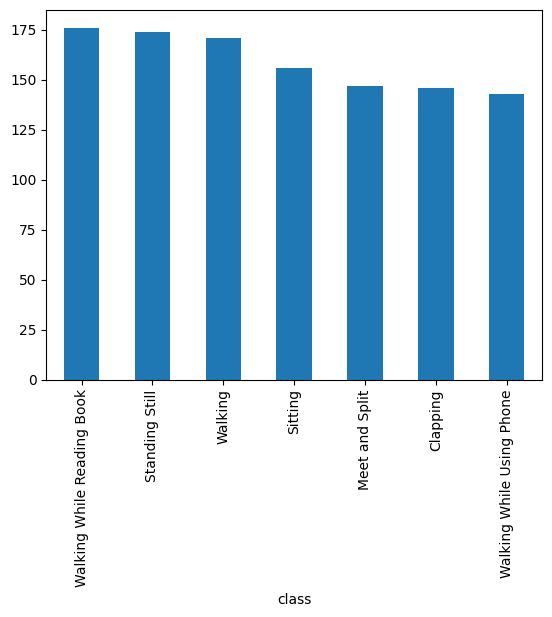

In [15]:
df_info['class'].value_counts().plot(kind='bar')


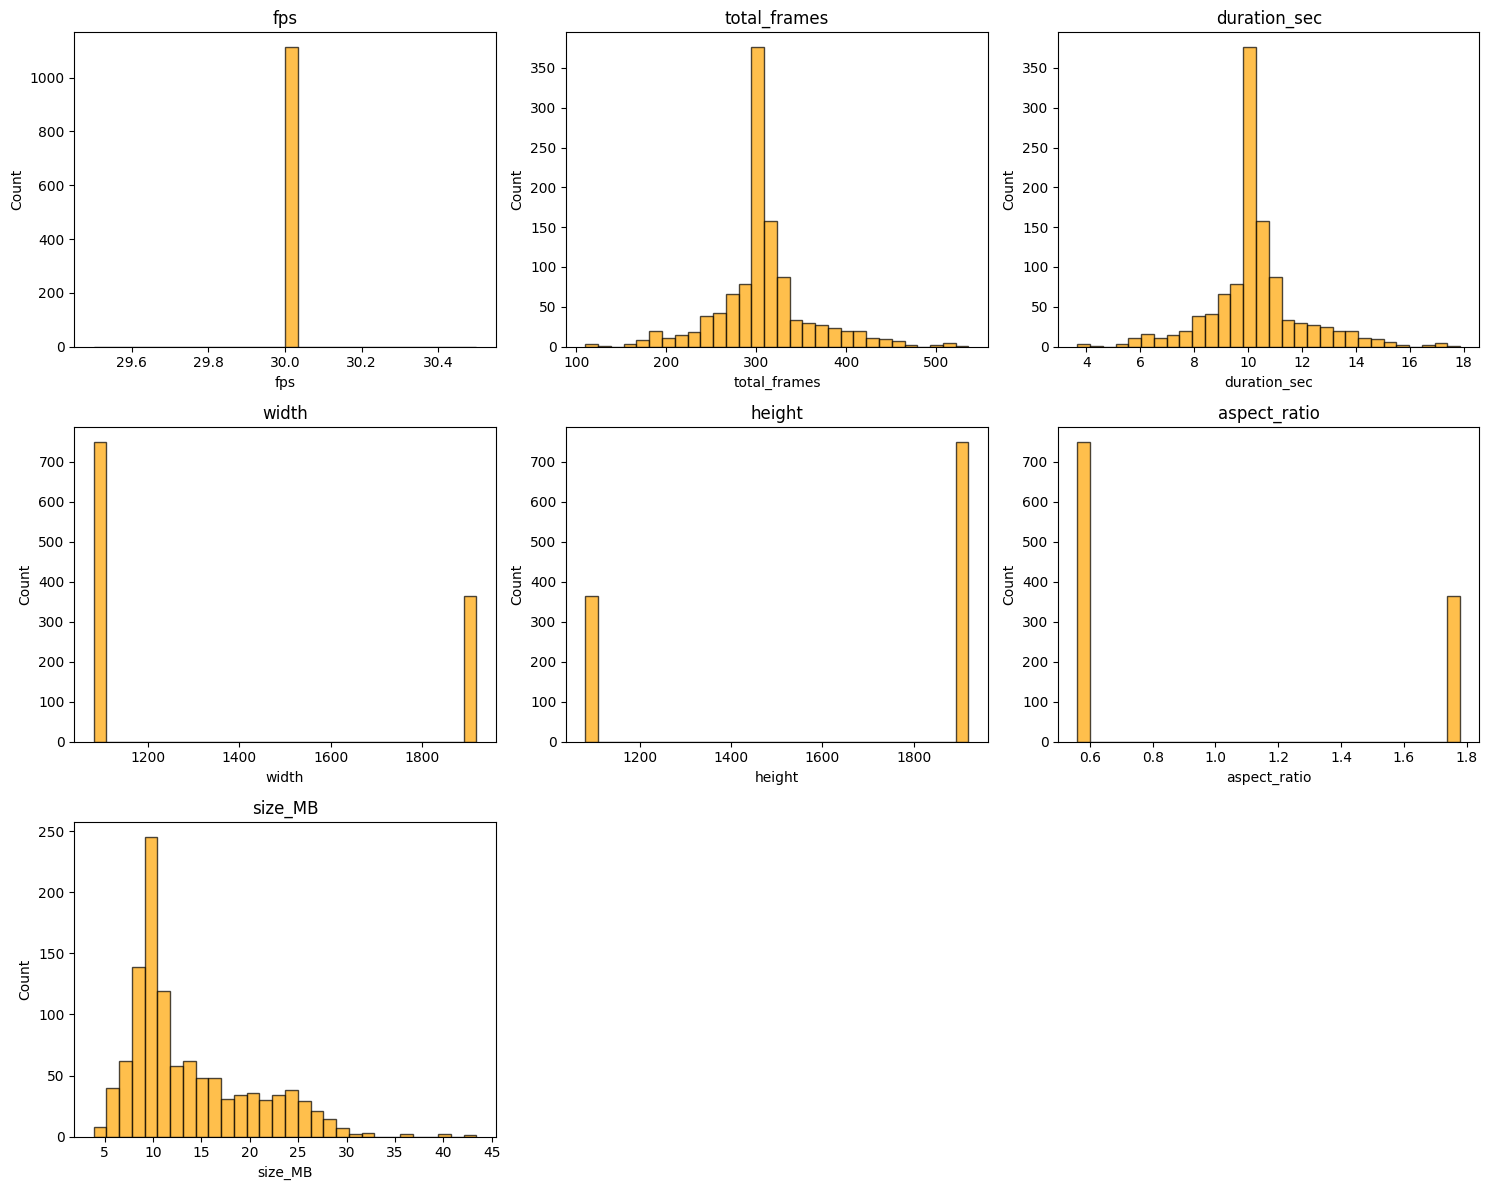

In [16]:
import matplotlib.pyplot as plt

cols_to_plot = ['fps', 'total_frames', 'duration_sec',
                'width', 'height', 'aspect_ratio', 'size_MB']

plt.figure(figsize=(15, 12))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)
    plt.hist(df_info[col].dropna(), bins=30, color='orange', alpha=0.7, edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


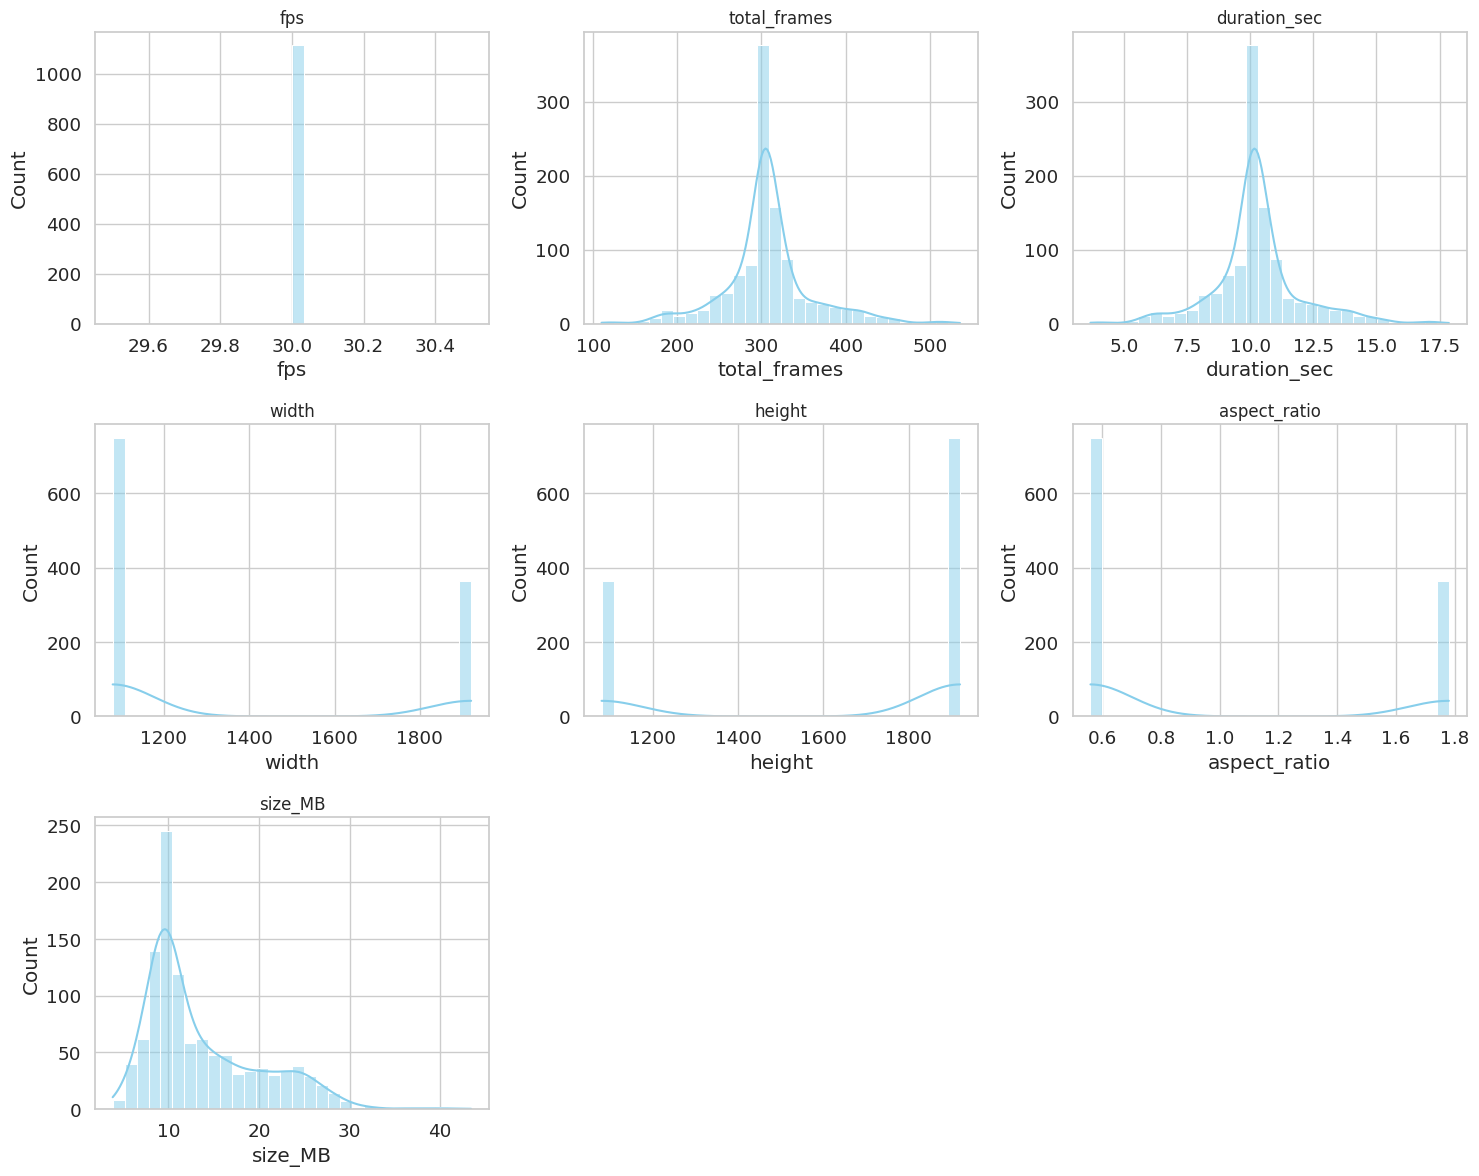

In [17]:
# Same Graphs using Seaborn 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn") # To Remove warnings

# List of numeric columns you want to visualize
cols_to_plot = ['fps', 'total_frames', 'duration_sec', 
                'width', 'height', 'aspect_ratio', 'size_MB']

# Set a beautiful theme
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Create subplots grid
plt.figure(figsize=(15, 12))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)  # 3 rows × 3 cols grid (adjust if needed)
    sns.histplot(df_info[col], bins=30, kde=True, color='skyblue')
    plt.title(col, fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


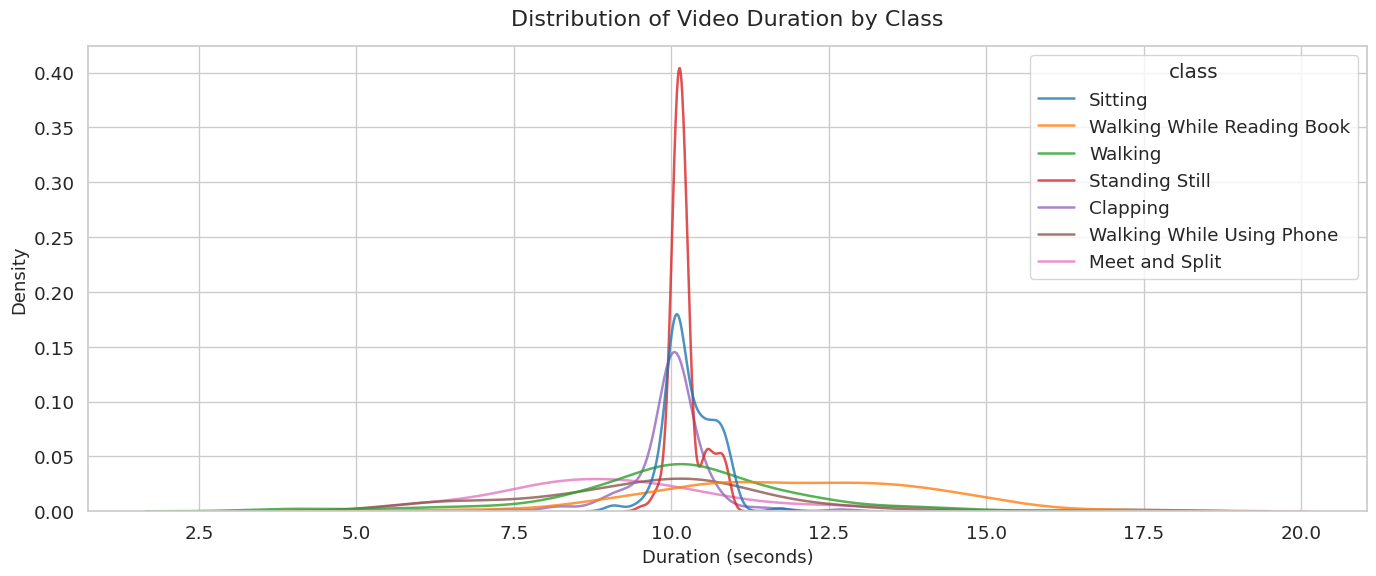

In [18]:

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

plt.figure(figsize=(14, 6))  # wider figure for clarity
sns.set(style="whitegrid", font_scale=1.2)

# KDE only (no histogram bars)
sns.kdeplot(
    data=df_info,
    x='duration_sec',
    hue='class',
    linewidth=1.8,    # slightly thicker lines
    alpha=0.8,        # transparent lines for overlap
    palette='tab10'   # clean 10-color palette
)

plt.title('Distribution of Video Duration by Class', fontsize=16, pad=15)
plt.xlabel('Duration (seconds)', fontsize=13)
plt.ylabel('Density', fontsize=13)  # change label to Density since it's KDE

plt.tight_layout()
plt.show()


In [19]:
df_info['resolution'].value_counts()

resolution
1080x1920    748
1920x1080    365
Name: count, dtype: int64

In [20]:
# Method 1 - Group and Count
resolution_counts = df_info.groupby(['class', 'resolution']).size().reset_index(name='count')
print(resolution_counts)

print("\n" + "-" * 50 + "\n")

# Method 2 - As a pivot table
pivot_table = df_info.pivot_table(
    index='class',
    columns='resolution',
    values='video_name',   # or any column
    aggfunc='count',
    fill_value=0
)
print(pivot_table)

print("\n" + "-" * 50 + "\n")


# Method 3 - Pretty printed group output

for class_name, group in df_info.groupby('class'):
    print(f"\n📁 {class_name}")
    print(group['resolution'].value_counts())


                         class resolution  count
0                     Clapping  1080x1920    140
1                     Clapping  1920x1080      6
2               Meet and Split  1080x1920     71
3               Meet and Split  1920x1080     76
4                      Sitting  1080x1920    156
5               Standing Still  1080x1920    174
6                      Walking  1080x1920     89
7                      Walking  1920x1080     82
8   Walking While Reading Book  1920x1080    176
9    Walking While Using Phone  1080x1920    118
10   Walking While Using Phone  1920x1080     25

--------------------------------------------------

resolution                  1080x1920  1920x1080
class                                           
Clapping                          140          6
Meet and Split                     71         76
Sitting                           156          0
Standing Still                    174          0
Walking                            89         82
Walking While Re

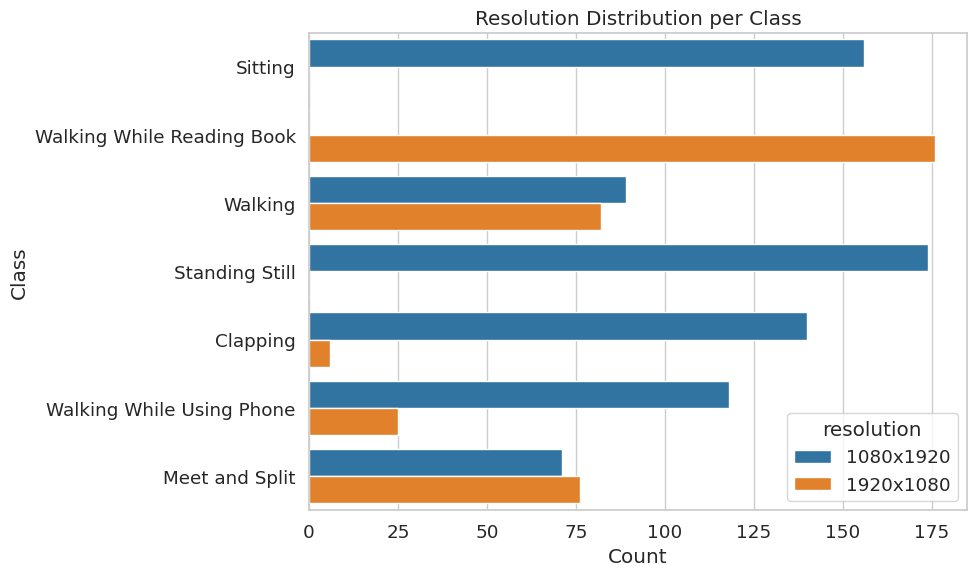

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df_info, y='class', hue='resolution', palette='tab10')
plt.title('Resolution Distribution per Class')
plt.xlabel('Count')
plt.ylabel('Class')

plt.tight_layout()
plt.show()


In [23]:
import pandas as pd

# Define bins and labels
bins = [0, 5, 15, float('inf')]
labels = ['<5 sec', '5-15 sec', '>15 sec']

# Create a new column for duration category
df_info['duration_category'] = pd.cut(df_info['duration_sec'], bins=bins, labels=labels, right=False)

# Group by class and duration category, then count
duration_counts = df_info.groupby(['class', 'duration_category']).size().reset_index(name='count')

print(duration_counts)

print("\n" + "-" * 50 + "\n")

# Method 2 
pivot = duration_counts.pivot(index='class', columns='duration_category', values='count').fillna(0)
print(pivot)


                         class duration_category  count
0                     Clapping            <5 sec      0
1                     Clapping          5-15 sec    146
2                     Clapping           >15 sec      0
3               Meet and Split            <5 sec      0
4               Meet and Split          5-15 sec    145
5               Meet and Split           >15 sec      2
6                      Sitting            <5 sec      0
7                      Sitting          5-15 sec    156
8                      Sitting           >15 sec      0
9               Standing Still            <5 sec      0
10              Standing Still          5-15 sec    174
11              Standing Still           >15 sec      0
12                     Walking            <5 sec      4
13                     Walking          5-15 sec    166
14                     Walking           >15 sec      1
15  Walking While Reading Book            <5 sec      0
16  Walking While Reading Book          5-15 sec

/tmp/ipykernel_9028/1054459747.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_counts = df_info.groupby(['class', 'duration_category']).size().reset_index(name='count')


In [24]:
print(df_info.shape)

(1113, 12)


### **Main Pipeline (Data Preprocessing, Train Test Split, Model Architecture, Training & Testing)**

In [1]:

import os
import glob
import random
import math
from tqdm import tqdm
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import itertools
import json


In [2]:
# ----------------------------
# User variables / hyperparams
# ----------------------------
DATA_DIR = '/kaggle/input/human-activity-recognition-video-dataset/Human Activity Recognition - Video Dataset'
OUTPUT_META = 'video_dataset_info.csv'   # metadata (if you already have, skip generation)
SAMPLES_ROOT = '/kaggle/working/video_samples'  # where we store sampled npz files
UNIFORM_DIR = os.path.join(SAMPLES_ROOT, 'samples_uniform')
SEGMENT_DIR = os.path.join(SAMPLES_ROOT, 'samples_segment')


In [3]:
N_FRAMES = 16            # frames per clip (change to 32 if GPU allows)
IMG_SIZE = (224, 224)    # H, W for CNN (MobileNetV2 default-ish)
BATCH_SIZE = 8
EPOCHS = 20
RANDOM_SEED = 42
AUTOTUNE = tf.data.AUTOTUNE
NUM_CLASSES = None       # will be set from classes discovered

In [4]:
os.makedirs(UNIFORM_DIR, exist_ok=True)
os.makedirs(SEGMENT_DIR, exist_ok=True)

In [5]:
# ----------------------------
# 1) Scan dataset and build dataframe (if not already created)
# ----------------------------
def build_dataset_info(data_dir, out_csv=OUTPUT_META):
    info_list = []
    for class_name in sorted(os.listdir(data_dir)):
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        for fname in os.listdir(class_path):
            video_path = os.path.join(class_path, fname)
            if not os.path.isfile(video_path): 
                continue
            try:
                cap = cv2.VideoCapture(video_path)
                if not cap.isOpened():
                    print(f"Warning: cannot open {video_path}")
                    continue
                fps = cap.get(cv2.CAP_PROP_FPS) or 0
                total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT) or 0)
                width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) or 0)
                height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) or 0)
                duration = total_frames / fps if fps>0 else 0
                size_MB = os.path.getsize(video_path)/(1024*1024)
                info_list.append({
                    'class': class_name,
                    'video_name': fname,
                    'path': video_path,
                    'fps': round(fps,2),
                    'total_frames': total_frames,
                    'duration_sec': round(duration, 2),
                    'resolution': f"{width}x{height}",
                    'width': width,
                    'height': height,
                    'aspect_ratio': round(width/height,2) if height>0 else None,
                    'size_MB': round(size_MB,2)
                })
                cap.release()
            except Exception as e:
                print(f"Error reading {video_path}: {e}")
    df = pd.DataFrame(info_list)
    df.to_csv(out_csv, index=False)
    return df

In [6]:
# If you already have df_info from earlier steps, load it instead of re-scanning.
if not os.path.exists(OUTPUT_META):
    print("Building dataset info (may take time)...")
    df_info = build_dataset_info(DATA_DIR)
else:
    df_info = pd.read_csv(OUTPUT_META)
print("Loaded dataset info shape:", df_info.shape)
print(df_info['class'].value_counts())

Building dataset info (may take time)...
Loaded dataset info shape: (1113, 11)
class
Walking While Reading Book    176
Standing Still                174
Walking                       171
Sitting                       156
Meet and Split                147
Clapping                      146
Walking While Using Phone     143
Name: count, dtype: int64


In [7]:
# Prepare label mapping
classes = sorted(df_info['class'].unique().tolist())
NUM_CLASSES = len(classes)
label2idx = {c:i for i,c in enumerate(classes)}
idx2label = {i:c for c,i in label2idx.items()}
print("Classes:", classes)
print("Label map:", label2idx)

Classes: ['Clapping', 'Meet and Split', 'Sitting', 'Standing Still', 'Walking', 'Walking While Reading Book', 'Walking While Using Phone']
Label map: {'Clapping': 0, 'Meet and Split': 1, 'Sitting': 2, 'Standing Still': 3, 'Walking': 4, 'Walking While Reading Book': 5, 'Walking While Using Phone': 6}


In [8]:

# ----------------------------
# 2) Pre-extract sampled clips and save as .npz files
# ----------------------------

# Utility: load frames with OpenCV quickly, return list of frames as RGB uint8
def read_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # OpenCV read is BGR — convert to RGB
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)
    cap.release()
    return frames


def resize_frame(frame, img_size=IMG_SIZE):
    return cv2.resize(frame, (img_size[1], img_size[0]), interpolation=cv2.INTER_AREA)


The `interpolation` parameter in `cv2.resize()` determines how the pixel values are estimated when resizing an image. Essentially, when you change the dimensions of an image, the algorithm has to decide how to "fill in" or "average" pixel values for the new size, especially when scaling up or down.

Here’s a breakdown of what `cv2.INTER_AREA` does specifically:

* **`cv2.INTER_AREA`**: This is generally used for **downscaling** an image. It works by averaging the pixel values in the input image to reduce the image size, which can preserve the image quality better when shrinking. It's a very efficient method for resizing images when you need to reduce their dimensions and is often preferred for **downsampling**.

Other interpolation methods you could use with `cv2.resize()` include:

1. **`cv2.INTER_NEAREST`**: Nearest neighbor interpolation, where the value of the new pixel is taken from the nearest source pixel. It’s fast but can lead to pixelated results, especially for enlargements.

2. **`cv2.INTER_LINEAR`**: Bilinear interpolation, which uses a weighted average of the four nearest pixels to estimate a new pixel. It is commonly used for enlarging images because it offers smoother results than nearest neighbor but can be slower.

3. **`cv2.INTER_CUBIC`**: Bicubic interpolation, which considers 16 pixels (a 4x4 grid) to estimate new pixel values. It tends to give better results for enlargements compared to bilinear but is slower.

4. **`cv2.INTER_LANCZOS4`**: A more advanced interpolation method that uses a sinc function for resizing. It’s generally used for high-quality downsampling.

So in your case:

```python
cv2.resize(frame, (img_size[1], img_size[0]), interpolation=cv2.INTER_AREA)
```

Since you're likely resizing to a smaller image size (downscaling), `INTER_AREA` is probably the best choice for keeping the image's quality while reducing its dimensions.


Choosing the right interpolation method depends on whether you're **scaling up** (enlarging) or **scaling down** (shrinking) an image and the desired trade-off between **speed** and **quality**. Here's a more detailed guide on which interpolation to use in different situations:

### 1. **Downscaling (Shrinking an Image)**

When you're reducing the image size (i.e., the new dimensions are smaller than the original), you'll want to preserve as much detail as possible while minimizing artifacts like aliasing or blockiness.

* **Best choice: `cv2.INTER_AREA`**

  * **Why?** This method works by averaging pixel values, which helps preserve image quality during downsampling. It is generally the most accurate and produces the least distortion when reducing the image size.
  * **Use case:** When you need to **shrink an image** for display on a smaller screen or for reducing computational load (e.g., resizing for a neural network input).
* **Alternatives:**

  * **`cv2.INTER_LINEAR`** (bilinear interpolation) is sometimes used for downscaling, but `INTER_AREA` is generally preferred for quality, especially with significant downscaling.
  * **`cv2.INTER_CUBIC`** or **`cv2.INTER_LANCZOS4`** can also be used for higher-quality downscaling, but they may be slower, and `INTER_AREA` is often faster for smaller reductions.

### 2. **Upscaling (Enlarging an Image)**

When you're increasing the image size (i.e., the new dimensions are larger than the original), you need to create new pixel values, which can lead to interpolation artifacts.

* **Best choice: `cv2.INTER_CUBIC`**

  * **Why?** Bicubic interpolation considers 16 neighboring pixels (a 4x4 grid) to generate the new pixel values, resulting in a smoother and more natural-looking image than bilinear interpolation. It's commonly used for enlarging images without introducing significant pixelation.
  * **Use case:** When you need to **enlarge** an image (e.g., for printing, display on high-resolution screens, or in deep learning applications where scaling up is required).

* **Alternatives:**

  * **`cv2.INTER_LINEAR`** is a good choice if you want a balance between quality and performance. It produces less smoothness than cubic interpolation but is faster.
  * **`cv2.INTER_LANCZOS4`** is the highest quality method for upscaling, especially for very large images, but it’s the slowest. It’s best for applications where **quality is paramount** (e.g., professional image resizing, high-resolution output).
  * **`cv2.INTER_NEAREST`** is typically **not recommended for enlarging**, as it can result in a very pixelated, blocky image (nearest-neighbor interpolation).

### 3. **General Guidelines**

* **Speed vs Quality:**

  * **Faster methods (e.g., `INTER_NEAREST`, `INTER_LINEAR`)** are better when speed is more important than the visual quality of the resized image (e.g., real-time applications, video processing).
  * **Higher quality methods (e.g., `INTER_CUBIC`, `INTER_LANCZOS4`)** are better when quality is the priority, but they are slower and more computationally intensive.

* **Simple use cases:**

  * **Downscaling:** Use `cv2.INTER_AREA` for best results.
  * **Upscaling:** Start with `cv2.INTER_CUBIC` for better visual quality, and use `cv2.INTER_LINEAR` if you need faster results with a reasonable trade-off in quality.

### Summary Table

| **Action**               | **Best Interpolation** | **Reason**                                               |
| ------------------------ | ---------------------- | -------------------------------------------------------- |
| **Downscaling**          | `cv2.INTER_AREA`       | Best for reducing size, preserving quality (smooth)      |
| **Upscaling**            | `cv2.INTER_CUBIC`      | Smooths the image and preserves details when enlarging   |
| **Fast downscaling**     | `cv2.INTER_LINEAR`     | Quick but with less accuracy compared to `INTER_AREA`    |
| **Fast upscaling**       | `cv2.INTER_LINEAR`     | Quick but may result in some blurriness                  |
| **High-quality upscale** | `cv2.INTER_LANCZOS4`   | Best for large upscale with the highest quality          |
| **Fast and low-quality** | `cv2.INTER_NEAREST`    | Quick, but very pixelated (rarely used for quality work) |

By selecting the right interpolation method, you can tailor the image resizing to your specific needs in terms of **speed** and **quality**.


## **In My dataset Situation which is best**

---

### 🖼️ Input frames

You have two types of input image shapes:

1. **1080×1920** (portrait orientation) → 748 frames
2. **1920×1080** (landscape orientation) → 365 frames

And you want to **resize all of them to 224×224** (a **square** image, typically used for deep learning models like CNNs, ResNet, etc.).

---

### ⚙️ Code you used

```python
cv2.resize(frame, (img_size[1], img_size[0]), interpolation=cv2.INTER_AREA)
```

with `img_size = (224, 224)`

---

### ✅ So — is `cv2.INTER_AREA` good here?

Yes, **it’s a good choice** — *if you’re reducing the image size* (which you are, since both 1080×1920 and 1920×1080 are much larger than 224×224).

#### Why `INTER_AREA` is appropriate:

* It’s specifically optimized for **downsampling** (shrinking).
* It computes pixel values using **resampling / area relation**, which avoids aliasing and preserves details as much as possible when reducing size.
* It’s faster and cleaner for this kind of large reduction.

So, in your case:

* ✅ **You’re going from ~2 million pixels → 50k pixels** — big downscale.
* ✅ **You want to maintain visual quality** (for ML input, less noise, less aliasing).
* ✅ **Speed is acceptable** — `INTER_AREA` is efficient.

Hence, **`INTER_AREA` is the correct and best interpolation for this use case.**

---

### ⚠️ However — one important thing to consider:

You're resizing **rectangular frames (1080×1920 or 1920×1080)** into **square 224×224**.

That means your images will be **stretched or squished**, unless you handle the aspect ratio before resizing.

#### Options to preserve aspect ratio:

1. **Crop** before resizing
   Example: center-crop to a square (1080×1080) and then resize to 224×224.

2. **Pad** to a square shape
   Add black (or mean-color) borders to make the frame square before resizing.

Example:

```python
import cv2
import numpy as np

def resize_with_padding(frame, size=(224, 224)):
    h, w = frame.shape[:2]
    # compute scale
    scale = size[0] / max(h, w)
    new_w, new_h = int(w * scale), int(h * scale)
    resized = cv2.resize(frame, (new_w, new_h), interpolation=cv2.INTER_AREA)
    
    # pad to make square
    delta_w = size[1] - new_w
    delta_h = size[0] - new_h
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    color = [0, 0, 0]  # black padding
    new_frame = cv2.copyMakeBorder(resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    return new_frame
```

This way, your content stays undistorted and correctly scaled.

---

### ✅ TL;DR Recommendation

| Task                          | Recommended Method        | Notes                              |
| ----------------------------- | ------------------------- | ---------------------------------- |
| Downscaling (1080p → 224×224) | `cv2.INTER_AREA`          | ✔ Best quality for large downscale |
| Upscaling (small → large)     | `cv2.INTER_CUBIC`         | Better smoothness                  |
| Maintaining aspect ratio      | Crop or pad before resize | Prevent distortion                 |

---

So yes — your interpolation choice is **perfect** for this scenario.
Just make sure you **handle aspect ratio** correctly depending on whether you want a *distorted* or *letterboxed/cropped* 224×224 image.


### **2 Types of Frame Sampling Techniques**


Let’s go through **all known sampling techniques** systematically — including **why, when, and how** they’re used, along with **pros and cons**.

---

## 🧠 1️⃣ Uniform Sampling  *(the baseline — covered before)*

**Idea:** Sample frames evenly spaced across the entire duration.

**How:**
If total frames = 100 and desired = 16 → take one every 100/16 ≈ 6th frame.

**Used in:**

* Standard HAR
* Gesture recognition
* Datasets with stable motion (walking, sitting, clapping)

**Pros:**
✅ Keeps full temporal coverage
✅ Simple and deterministic
✅ No bias toward start/end

**Cons:**
❌ Can miss subtle motion changes if action happens fast
❌ Not robust to variable speed in actions

---

## 🎲 2️⃣ Random Sampling  *(data augmentation version)*

**Idea:** Randomly pick T frames.

**Used in:**

* Robust model training (each epoch sees different parts)
* When actions span the full clip (like “running”)

**Pros:**
✅ Adds variability → acts as temporal augmentation
✅ Simple to implement

**Cons:**
❌ Can miss important sub-action
❌ Temporal order sometimes less preserved

---

## 🧩 3️⃣ Segment-based / Hybrid Sampling  *(best trade-off — covered before)*

**Idea:** Split video into equal segments, then pick 1 random frame from each.

**Used in:**

* Almost all modern HAR datasets (UCF101, HMDB51, Kinetics)
* When you need both temporal coverage and randomness

**Pros:**
✅ Keeps entire video context
✅ Randomness adds robustness
✅ Balances temporal uniformity and variability

**Cons:**
❌ Still ignores intra-segment motion variation

---

## ⚙️ 4️⃣ Keyframe-based Sampling  *(content-aware sampling)*

**Idea:**
Instead of sampling by position or time, pick **frames that contain major motion or visual changes** — “keyframes.”

**How it works:**

* Compute **frame difference** (like mean absolute pixel change between consecutive frames)
* Select frames with highest motion difference values
* Optionally, cluster frame features and select cluster centers

**Used in:**

* Action recognition with long videos
* Video summarization, surveillance

**Pros:**
✅ Keeps only *informative* frames
✅ Reduces redundancy dramatically
✅ Useful for long, slow-changing videos

**Cons:**
❌ Requires pre-processing (motion estimation or feature extraction)
❌ Might skip contextual frames (if motion-based only)

---

## 🌀 5️⃣ Optical Flow-guided Sampling

**Idea:**
Use optical flow (motion magnitude between frames) to guide which frames to select — i.e., select frames where motion intensity is high.

**Used in:**

* Sports analysis, gesture recognition
* Situations where movement is the main cue

**Pros:**
✅ Focuses on dynamic parts
✅ Better motion representation
✅ Often improves recognition accuracy

**Cons:**
❌ Computationally expensive (optical flow calc is slow)
❌ May fail for static actions (like “sitting”)

---

## ⏱️ 6️⃣ Importance Sampling / Attention-guided Sampling

**Idea:**
Train a lightweight model (or use a heuristic) to assign “importance” to each frame → then sample more frames from important segments.

**Used in:**

* Efficient video classification
* Video transformers (e.g., ViViT, TimeSformer use temporal attention)

**How it works:**

1. Compute importance score (motion, entropy, or learned attention).
2. Sample proportionally to importance.

**Pros:**
✅ Keeps most relevant moments
✅ Reduces input size drastically
✅ Great for long untrimmed videos

**Cons:**
❌ Requires pre-trained attention model or feature pass
❌ Complex to implement

---

## 🧭 7️⃣ Adaptive Frame Sampling (Dynamic sampling)

**Idea:**
The sampling rate changes *based on video content*.

* For fast motion → higher frame rate (dense sampling)
* For slow motion → lower frame rate (sparse sampling)

**Used in:**

* Continuous action monitoring (CCTV, sports analytics)
* Long untrimmed videos with varying activity speed

**Pros:**
✅ Adjusts to temporal dynamics
✅ Efficient and preserves motion detail

**Cons:**
❌ Needs motion estimation or temporal modeling
❌ Harder to parallelize

---

## 🪞 8️⃣ Scene Change-based Sampling

**Idea:**
Detect scene transitions (e.g., shot boundary detection), then sample frames around scene changes.

**Used in:**

* Video summarization
* Movie scene classification
* Story segmentation

**Pros:**
✅ Focuses on visual context changes
✅ Efficient for videos with multiple events

**Cons:**
❌ Irrelevant for single-action clips (like HAR)
❌ Not useful for continuous motion

---

## 🧬 9️⃣ Multi-clip Sampling (Clip-level sampling)

**Idea:**
Instead of one clip per video, sample *multiple short clips* (e.g., 3 clips × 16 frames) per video, especially for long videos.

**Used in:**

* Action recognition models like I3D, C3D, and SlowFast
* Training-time augmentation — each epoch samples different clips

**Pros:**
✅ Models can see different parts of video each time
✅ More temporal diversity

**Cons:**
❌ Increases training time
❌ Needs careful fusion (average predictions across clips)

---

## 🔄 10️⃣ Temporal Downsampling (Fixed step sampling)

**Idea:**
Pick every *k-th* frame — e.g., take one frame every 5 frames → reduces frame rate.

**Used in:**

* High-FPS datasets (e.g., 60 FPS → 12 FPS)
* Reducing computational cost

**Pros:**
✅ Simple and efficient
✅ Preserves consistent motion pattern

**Cons:**
❌ May miss quick gestures
❌ Loses temporal granularity

---

## 📊 11️⃣ Multi-rate Sampling (used in SlowFast Networks)

**Idea:**
Use **two parallel sampling rates**:

* “Slow” branch → samples few frames sparsely → captures semantic context
* “Fast” branch → samples densely → captures fine motion details

**Used in:**

* **SlowFast Networks** (Facebook AI)
* High-level + motion-level understanding simultaneously

**Pros:**
✅ Best of both worlds
✅ Very high accuracy in benchmarks (e.g., Kinetics-600)

**Cons:**
❌ Complex and computationally heavy
❌ Not needed for small datasets

---

## 🧠 Summary Table

| Technique             | Idea                  | Pros                      | Cons                  | Best For              |
| --------------------- | --------------------- | ------------------------- | --------------------- | --------------------- |
| Uniform               | Evenly spaced         | Simple, covers full video | Miss fast actions     | Baseline HAR          |
| Random                | Random frames         | Temporal augmentation     | May miss info         | Training augmentation |
| Segment-based         | 1 random per segment  | Balanced                  | Slight complexity     | HAR, general use      |
| Keyframe-based        | Motion/feature change | Efficient                 | Misses context        | Video summarization   |
| Optical Flow-guided   | Motion-based          | Captures dynamics         | Expensive             | Sports, gestures      |
| Importance/Attention  | Weighted sampling     | Keeps key parts           | Needs model           | Transformers          |
| Adaptive              | Varies rate by motion | Efficient                 | Complex               | Long videos           |
| Scene-change          | On visual cuts        | Context-aware             | Irrelevant to HAR     | Movies                |
| Multi-clip            | Multiple clips/video  | Richer learning           | Expensive             | I3D, C3D              |
| Temporal Downsample   | Every k-th frame      | Fast                      | May miss fast actions | High-FPS data         |
| Multi-rate (SlowFast) | Two rates             | Detailed + semantic       | Heavy                 | Advanced models       |

---

## ✅ Summary Takeaway

For **your current HAR dataset**, you don’t need complex strategies.

👉 Recommended:

* **Training:** Segment-based random sampling (best trade-off)
* **Validation/Test:** Uniform sampling (stable, deterministic)

If you move to longer or untrimmed videos later, you can explore:

* Keyframe or importance sampling (content-aware)
* Multi-clip sampling (I3D style)
* SlowFast (for large datasets)

---


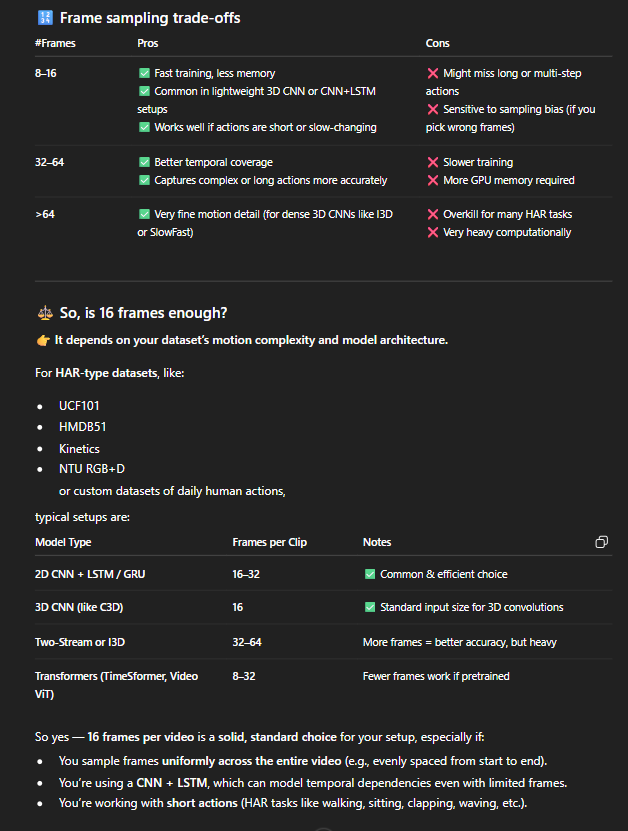

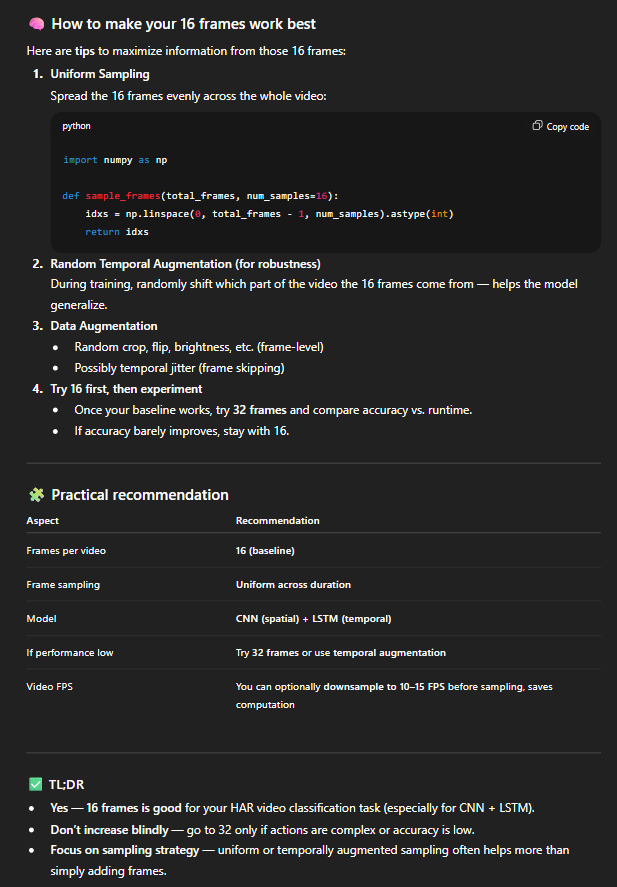

In [10]:


def uniform_sample_indices(total_frames, n_frames):
    if total_frames <= 0:
        return [0]*n_frames
    if total_frames >= n_frames:
        # produce n frames evenly spaced across entire video
        step = total_frames / float(n_frames)
        indices = [min(int(step * i), total_frames-1) for i in range(n_frames)]
    else:
        # if video shorter than n_frames, repeat last frame
        indices = list(range(total_frames)) + [total_frames-1]*(n_frames - total_frames)
    return indices


def segment_sample_indices(total_frames, n_frames):
    # split into n_frames segments and pick one index randomly from each segment
    if total_frames <= 0:
        return [0]*n_frames
    if total_frames >= n_frames:
        seg_len = total_frames / float(n_frames)
        indices = []
        for i in range(n_frames):
            start = int(math.floor(seg_len * i))
            end = int(math.floor(seg_len * (i+1)))
            if end <= start:
                idx = min(start, total_frames-1)
            else:
                idx = random.randint(start, end-1)
            indices.append(min(idx, total_frames-1))
    else:
        # fallback: repeat last frame as needed
        indices = list(range(total_frames)) + [total_frames-1]*(n_frames - total_frames)
    return indices


In [11]:

# Function to extract and save samples for a given row
# take each video and create a file with extension .npz

# So each .npz file contains three arrays/entries: (np.savez_compressed(out_path, clip=clip, label=label2idx[class_name], src_path=video_path))

# 'clip' → your sampled video frames (shape (T, H, W, C))
# 'label' → the class index (a scalar integer)
# 'src_path' → the original video path (string)



def process_and_save_sample(row, strategy='uniform', out_dir=UNIFORM_DIR, n_frames=N_FRAMES, img_size=IMG_SIZE):
    video_path = row['path']
    class_name = row['class']
    video_name = os.path.splitext(row['video_name'])[0]
    try:
        frames = read_video_frames(video_path)
        total = len(frames)
        if strategy == 'uniform':
            idxs = uniform_sample_indices(total, n_frames)
        elif strategy == 'segment':
            idxs = segment_sample_indices(total, n_frames)
        else:
            raise ValueError("strategy must be 'uniform' or 'segment'")
        sampled = []
        for idx in idxs:
            if idx < 0 or idx >= total:
                # fallback black frame
                sampled.append(np.zeros((img_size[0], img_size[1], 3), dtype=np.uint8))
            else:
                f = frames[idx]
                f = resize_frame(f, img_size)
                sampled.append(f)
        clip = np.stack(sampled, axis=0)  # shape: (T, H, W, C), dtype uint8
        # Save: filename include class and video name
        fname = f"{class_name}__{video_name}__{os.path.basename(video_path)}.npz"
        out_path = os.path.join(out_dir, fname)
        # include label index and original path in metadata
        np.savez_compressed(out_path, clip=clip, label=label2idx[class_name], src_path=video_path)
        return True
    except Exception as e:
        print("Error processing", video_path, e)
        return False


In [12]:

# Preprocess all videos for both strategies (this may take time)
# We skip reprocessing if .npz already exists to save time on reruns.

def preprocess_all(df_info, strategy, out_dir):
    os.makedirs(out_dir, exist_ok=True)
    print(f"Preprocessing strategy={strategy} into {out_dir}")
    processed = 0
    for _, row in tqdm(df_info.iterrows(), total=len(df_info)):
        # create unique expected filename same as in process_and_save_sample
        video_name_base = os.path.splitext(row['video_name'])[0]
        expected_fname = f"{row['class']}__{video_name_base}__{os.path.basename(row['path'])}.npz"
        expected_path = os.path.join(out_dir, expected_fname)
        if os.path.exists(expected_path):
            processed += 1
            continue
        ok = process_and_save_sample(row, strategy=strategy, out_dir=out_dir, n_frames=N_FRAMES, img_size=IMG_SIZE)
        if ok:
            processed += 1
    print(f"Preprocessing finished for {strategy}. Total processed: {processed}")

In [13]:
# Run preprocessing for both strategies (skip if already done)


# 1. Uniform sampling saves npz files into UNIFORM folder in output
preprocess_all(df_info, strategy='uniform', out_dir=UNIFORM_DIR)


Preprocessing strategy=uniform into /kaggle/working/video_samples/samples_uniform


100%|██████████| 1113/1113 [45:18<00:00,  2.44s/it]

Preprocessing finished for uniform. Total processed: 1113


In [14]:
# 2. Segment wise sampling 
preprocess_all(df_info, strategy='segment', out_dir=SEGMENT_DIR)

Preprocessing strategy=segment into /kaggle/working/video_samples/samples_segment


100%|██████████| 1113/1113 [44:25<00:00,  2.40s/it]

Preprocessing finished for segment. Total processed: 1113


In [15]:
# Build file lists for each strategy


# this code returns DataFrame with two columns:
# file: absolute file path to each .npz
# label: integer label for the corresponding video


def build_samples_list(samples_dir):
    files = sorted(glob.glob(os.path.join(samples_dir, '*.npz')))
    entries = []
    for p in files:
        try:
            with np.load(p) as data:
                label = int(data['label'])
        except Exception:
            # fallback read by filename
            # parse label from file name prefix
            fname = os.path.basename(p)
            cls = fname.split('__')[0]
            label = label2idx.get(cls, -1)
        entries.append({'file': p, 'label': label})
    return pd.DataFrame(entries)



In [16]:
df_uniform = build_samples_list(UNIFORM_DIR)
df_segment = build_samples_list(SEGMENT_DIR)
print("Uniform samples:", len(df_uniform), "Segment samples:", len(df_segment))


Uniform samples: 1113 Segment samples: 1113


In [17]:
# ----------------------------
# 3) Train / Val / Test split (video-level) - stratified by label

# This returns 3 dataframe train_u, val_u, test_u for each corresponding sampling stratergy 
# each dataframe contains 2 columns :
# file : exact path of npz 
# label : label value

# ----------------------------

def stratified_split(df_samples, test_size=0.15, val_size=0.15, random_state=RANDOM_SEED):
    # First split off test
    trainval, test = train_test_split(df_samples, test_size=test_size, stratify=df_samples['label'], random_state=random_state)
    # Now split trainval into train and val using val_size relative to original total
    # compute val ratio relative to trainval
    val_rel = val_size / (1.0 - test_size)
    train, val = train_test_split(trainval, test_size=val_rel, stratify=trainval['label'], random_state=random_state)
    return train.reset_index(drop=True), val.reset_index(drop=True), test.reset_index(drop=True)

train_u, val_u, test_u = stratified_split(df_uniform)
train_s, val_s, test_s = stratified_split(df_segment)

print("Uniform split sizes:", len(train_u), len(val_u), len(test_u))
print("Segment split sizes:", len(train_s), len(val_s), len(test_s))




Uniform split sizes: 779 167 167
Segment split sizes: 779 167 167


In [18]:
# Save splits to disk for reproducibility
os.makedirs('splits', exist_ok=True)
train_u.to_csv('splits/train_uniform.csv', index=False)
val_u.to_csv('splits/val_uniform.csv', index=False)
test_u.to_csv('splits/test_uniform.csv', index=False)
train_s.to_csv('splits/train_segment.csv', index=False)
val_s.to_csv('splits/val_segment.csv', index=False)
test_s.to_csv('splits/test_segment.csv', index=False)


### **From dataframe to actual data creation using tensorflow pipeline**

There is no chance of any Data Leakage on frame level here is why 
---

### 1️⃣ Where splitting happens

What I did:

```python
train_u, val_u, test_u = stratified_split(df_uniform)
train_s, val_s, test_s = stratified_split(df_segment)
```

Inside `stratified_split`:

```python
trainval, test = train_test_split(df_samples, test_size=test_size, stratify=df_samples['label'], random_state=random_state)
val_rel = val_size / (1.0 - test_size)
train, val = train_test_split(trainval, test_size=val_rel, stratify=trainval['label'], random_state=random_state)
```

✅ This is **video-level splitting**, not frame-level — i.e., our `df_samples` has **one row per video** (`.npz` clip), not per frame.

* Each `.npz` already contains `N_FRAMES` sampled from a **single video**.
* So splitting by row ensures **all frames from the same video stay together**.

---

### 2️⃣ Where `.npz` is created

In `process_and_save_sample`:

```python
clip = np.stack(sampled, axis=0)  # shape: (T, H, W, C)
np.savez_compressed(out_path, clip=clip, label=label2idx[class_name], src_path=video_path)
```

* Each `.npz` corresponds to **one sampled clip from one video**.
* The sampling strategy (`uniform` or `segment`) just picks frames **from that video**.
* Frames from one video are **never split across `.npz` files for the same strategy**.

✅ So within a single strategy, a video’s frames are all in **one `.npz`**, and `.npz` rows are split across train/val/test.

---

### 3️⃣ Multiple strategies

I have **uniform** and **segment** strategies:

* `df_uniform` and `df_segment` are separate.
* A video exists in **both strategies**, but that’s **expected** — you’re comparing different sampling methods.
* Train/val/test split is done **independently per strategy**, so leakage **between strategies** is possible if you merge them later — but as long as you train/evaluate **per strategy**, it’s safe.

---

### 4️⃣ What **could cause leakage**

* If We accidentally concatenated uniform + segment datasets and trained on both together **without deduplicating videos**, the same video frames could appear in train and val/test.
* If `read_video_frames()` accidentally reads overlapping temporal segments for multiple `.npz` clips per video **and we split them row-wise**, there could be overlap. But OUR current code **only makes one `.npz` per video per strategy**, so that’s fine.

---

### ✅ Conclusion

* **No frame-level leakage within each strategy**.
* Each video’s frames are in exactly **one `.npz`** and stay in the same split.
* **No train/val/test overlap** as long as you train **per strategy**.
* **Only potential issue**: if you mix uniform and segment datasets into one training set without checking video identity, the same video could appear in both train and val/test.

---




In [20]:

# Python function that loads a single .npz file from disk and returns:
# clip : a 4D array (T, H, W, C) (e.g., (16, 224, 224, 3))
# label : an integer class index

def npz_loader(path):
    # returns np array float32 / normalized
    with np.load(path.numpy().decode('utf-8')) as data:
        clip = data['clip']  # uint8 (T, H, W, C)
        label = int(data['label'])
        # normalize to [0,1]
        clip = clip.astype(np.float32) / 255.0
    return clip, label



# TensorFlow wrapper around the Python loader.
# tf.py_function() lets TensorFlow call normal Python code (npz_loader) inside a TensorFlow graph.

# It ensures that:
# clip → tensor of shape (T, H, W, 3)
# label → scalar integer tensor

# This function makes .npz → tf.Tensor.

def tf_npz_loader(path):
    # wrapper for py func
    clip, label = tf.py_function(npz_loader, [path], [tf.float32, tf.int32])
    # shape info: we know clip shape is (T, H, W, 3)
    clip.set_shape([N_FRAMES, IMG_SIZE[0], IMG_SIZE[1], 3])
    label.set_shape([])
    return clip, label


In [21]:
# optional data augmentation function (applied per clip(all 16 frames), consistent across frames)


# It randomly:
# Flips the clip horizontally (mirror)
# Adjusts brightness per-frame
# Clips pixel values to [0, 1]
# This is used only in the training dataset to improve model generalization

def clip_augment(clip, label):
    # clip: (T,H,W,3) floats in [0,1]
    # Apply random horizontal flip
    def _rand_flip(clip):
        if tf.random.uniform([]) < 0.5:
            clip = tf.image.flip_left_right(clip)
        return clip
    clip = tf.cond(tf.random.uniform([]) < 0.5, lambda: _rand_flip(clip), lambda: clip)
    # color jitter applied per-frame consistently: convert to HSV or adjust brightness
    clip = tf.image.random_brightness(clip, max_delta=0.1)
    clip = tf.clip_by_value(clip, 0.0, 1.0)
    return clip, label


In [22]:
# 1. Create base dataset from file paths
#    ds = tf.data.Dataset.from_tensor_slices(df_samples['file'].values.astype('str'))
#    Now ds contains a list of .npz file paths:

# 2. Shuffle (optional) -> Randomizes order during training.

# 3. Map the loader -> Loads each .npz file, giving (clip, label) tensors.
# 4. Augment (optional) -> Applies random brightness, flips, etc. (for training only).
# 5. Batch and prefetch -> Efficient batching and pipelining for training.

# Returns Final dataset ready for model input: 
# Batch of clips: (batch_size, T, H, W, 3)
# Batch of labels: (batch_size,)                           


def build_dataset_from_df(df_samples, batch_size=BATCH_SIZE, augment=False, shuffle=True):
    ds = tf.data.Dataset.from_tensor_slices(df_samples['file'].values.astype('str'))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df_samples), seed=RANDOM_SEED)
    ds = ds.map(tf_npz_loader, num_parallel_calls=AUTOTUNE)
    if augment:
        ds = ds.map(clip_augment, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(AUTOTUNE)
    return ds

In [23]:

# Example datasets for uniform strategy
train_ds_u = build_dataset_from_df(train_u, augment=True, shuffle=True)
val_ds_u = build_dataset_from_df(val_u, augment=False, shuffle=False)
test_ds_u = build_dataset_from_df(test_u, augment=False, shuffle=False)

# Example datasets for segment strategy
train_ds_s = build_dataset_from_df(train_s, augment=True, shuffle=True)
val_ds_s = build_dataset_from_df(val_s, augment=False, shuffle=False)
test_ds_s = build_dataset_from_df(test_s, augment=False, shuffle=False)

I0000 00:00:1761411872.010573      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761411872.011968      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [24]:
# Helper function to inspect a dataset for 1 batch
def inspect_dataset(ds, name, n=1):
    print(f"Inspecting dataset: {name}")
    for i, (clips, labels) in enumerate(ds.take(n)):
        print(f"Batch {i+1}:")
        print("  clips dtype:", clips.dtype)
        print("  clips shape:", clips.shape)
        print("  labels dtype:", labels.dtype)
        print("  labels shape:", labels.shape)
        print("  label values:", labels.numpy())
    print("-"*40)

# Example usage
inspect_dataset(train_ds_u, "train_ds_u")
inspect_dataset(val_ds_u, "val_ds_u")
inspect_dataset(test_ds_u, "test_ds_u")

inspect_dataset(train_ds_s, "train_ds_s")
inspect_dataset(val_ds_s, "val_ds_s")
inspect_dataset(test_ds_s, "test_ds_s")


Inspecting dataset: train_ds_u
Batch 1:
  clips dtype: <dtype: 'float32'>
  clips shape: (8, 16, 224, 224, 3)
  labels dtype: <dtype: 'int32'>
  labels shape: (8,)
  label values: [2 5 1 3 4 5 5 4]
----------------------------------------
Inspecting dataset: val_ds_u
Batch 1:
  clips dtype: <dtype: 'float32'>
  clips shape: (8, 16, 224, 224, 3)
  labels dtype: <dtype: 'int32'>
  labels shape: (8,)
  label values: [3 3 3 0 5 3 2 2]
----------------------------------------
Inspecting dataset: test_ds_u
Batch 1:
  clips dtype: <dtype: 'float32'>
  clips shape: (8, 16, 224, 224, 3)
  labels dtype: <dtype: 'int32'>
  labels shape: (8,)
  label values: [2 2 0 1 5 5 1 5]
----------------------------------------
Inspecting dataset: train_ds_s
Batch 1:
  clips dtype: <dtype: 'float32'>
  clips shape: (8, 16, 224, 224, 3)
  labels dtype: <dtype: 'int32'>
  labels shape: (8,)
  label values: [2 5 1 3 4 5 5 4]
----------------------------------------
Inspecting dataset: val_ds_s
Batch 1:
  clips d

### **Model Architecture Using MobileNet V2 + TimeDistributed CNN + LSTM**

In [25]:

# ----------------------------
# 5) Model: TimeDistributed CNN (MobileNetV2) + LSTM
# ----------------------------
def build_model_time_distributed(input_shape=(N_FRAMES, IMG_SIZE[0], IMG_SIZE[1], 3), num_classes=NUM_CLASSES, base_trainable=False):
    # per-frame feature extractor
    frame_input = tf.keras.Input(shape=input_shape, name='video_input')  # (T,H,W,3)
    # We will apply TimeDistributed wrapper around CNN
    # Use MobileNetV2 excluding top
    cnn_base = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
                                                 include_top=False, weights='imagenet', pooling='avg')
    cnn_base.trainable = base_trainable
    # apply TimeDistributed
    x = tf.keras.layers.TimeDistributed(cnn_base)(frame_input)  # (B, T, feat_dim)
    # Optionally reduce dimensionality
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(512, activation='relu'))(x)  # (B, T, 512)
    # LSTM to aggregate temporal information
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=False))(x)  # (B, 512)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=frame_input, outputs=outputs)
    return model

 Let’s break our model **step by step** — carefully, so it all clicks. I’ll explain **architecture, shapes, how TimeDistributed works, and the flow through CNN + LSTM**. This is a common setup for **video classification**, so understanding it will be super useful.

---

## **1️⃣ Input**

```python
frame_input = tf.keras.Input(shape=input_shape, name='video_input')  # (T,H,W,3)
```

* `input_shape = (N_FRAMES, IMG_SIZE[0], IMG_SIZE[1], 3)`
  Example: `(16, 224, 224, 3)` → 16 frames of 224x224 RGB images.
* This is **not just one image**, it’s a **sequence of images**.
* Tensor shape coming in: `(B, 16, 224, 224, 3)` where `B` is batch size.

---

## **2️⃣ TimeDistributed + CNN (MobileNetV2)**

```python
cnn_base = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    include_top=False, 
    weights='imagenet', 
    pooling='avg'
)
cnn_base.trainable = base_trainable

x = tf.keras.layers.TimeDistributed(cnn_base)(frame_input)
```

### **How it works**

* MobileNetV2 normally takes a single image `(H,W,C)` and outputs a **feature vector**.
* Our input is a **sequence of frames**, not a single image.

`TimeDistributed` “wraps” any layer (like CNN) to **apply it independently on each time step**:

* If input is `(B, T, H, W, C)`
* And the layer inside is CNN producing `(B, feat_dim)` per image
* `TimeDistributed(CNN)` produces `(B, T, feat_dim)`
* ✅ Each frame goes through CNN **independently**, so CNN weights are shared across time.

**Shape example**:

* Input: `(8, 16, 224, 224, 3)`
* CNN output per image (after `pooling='avg'`): `(1280,)` (MobileNetV2 feature dim)
* After `TimeDistributed(cnn_base)`: `(8, 16, 1280)`

---

## **3️⃣ TimeDistributed Dense**

```python
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(512, activation='relu'))(x)
```

* This is a fully connected layer **applied per frame**, not across frames.
* Input shape: `(B, T, 1280)`
* Output shape: `(B, T, 512)`
* Purpose: reduce dimensionality, make it easier for LSTM to handle, add non-linearity.

> ⚠️ Key: Dense is normally `(B, features)`, TimeDistributed makes it `(B, T, features)` by applying it **per time step**.

---

## **4️⃣ Bidirectional LSTM**

```python
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=False))(x)
```

* Input shape: `(B, T, 512)`
* LSTM processes **temporal information across frames**.

**Details**:

* LSTM output per timestep = 256 (hidden size)
* Bidirectional → concatenates forward and backward LSTM → 256 + 256 = 512
* `return_sequences=False` → output **only final hidden state**
* Output shape: `(B, 512)`

💡 So now we have a **single vector summarizing the whole video**.

---

## **5️⃣ Dropout + Dense**

```python
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
```

* `Dropout` → prevents overfitting
* `Dense(256)` → reduce dimensionality and add non-linearity
* `Dense(num_classes, softmax)` → final classification for each video

**Shape flow**:

* After LSTM: `(B, 512)`
* After Dense(256): `(B, 256)`
* After Dense(num_classes): `(B, num_classes)`

This is your **final output per video**.

---

## **6️⃣ Full Flow Summary with Shapes**

| Layer                        | Input Shape            | Output Shape           | Notes                              |
| ---------------------------- | ---------------------- | ---------------------- | ---------------------------------- |
| Input                        | `(B, 16, 224, 224, 3)` | `(B, 16, 224, 224, 3)` | 16 frames per video                |
| TimeDistributed(MobileNetV2) | `(B, 16, 224, 224, 3)` | `(B, 16, 1280)`        | Each frame processed independently |
| TimeDistributed(Dense 512)   | `(B, 16, 1280)`        | `(B, 16, 512)`         | Reduce feature dim                 |
| Bidirectional LSTM           | `(B, 16, 512)`         | `(B, 512)`             | Aggregates temporal info           |
| Dropout(0.4)                 | `(B, 512)`             | `(B, 512)`             | Regularization                     |
| Dense(256)                   | `(B, 512)`             | `(B, 256)`             | Non-linear transformation          |
| Dropout(0.3)                 | `(B, 256)`             | `(B, 256)`             | Regularization                     |
| Dense(num_classes, softmax)  | `(B, 256)`             | `(B, num_classes)`     | Final video-level prediction       |

---

## **7️⃣ Key Concepts**

* **TimeDistributed**: Apply the same layer **independently to each frame** in a sequence.
* **CNN inside TimeDistributed**: Extract **per-frame spatial features**.
* **LSTM after TimeDistributed**: Capture **temporal dynamics across frames**.
* **Dense after LSTM**: Map LSTM output to class predictions.
* **Bidirectional LSTM**: Looks at sequence **forward and backward** → better temporal modeling.

---

### ✅ TL;DR Intuition

1. CNN: “What is in this frame?” → per frame
2. LSTM: “How do frames change over time?” → across frames
3. Dense + softmax: “Which class does this video belong to?” → output

---



---

### **TimeDistributed does NOT capture temporal patterns.**

**What it does:**

* It **applies the same layer (e.g., CNN) independently to each frame** in the sequence.
* The weights of the CNN are shared across all frames, but **each frame is processed separately**.
* It’s like saying:

  > “For each frame, extract features using the same CNN.”

**What it does NOT do:**

* It does **not look at multiple frames together**.
* It does **not capture motion or temporal dependencies**.

---

### **Where temporal patterns are captured**

* That’s the **job of the LSTM (or any RNN / Transformer)** that comes **after TimeDistributed**.
* The LSTM sees the sequence of frame features `(B, T, feature_dim)` and can learn:

  * How objects move between frames
  * Temporal dynamics like “someone raising their hand”
* Without LSTM, your model would only classify based on **individual frames**, ignoring motion.

---

### **Analogy**

Think of a video as a **book**:

* **TimeDistributed CNN** → “Look at each page and summarize what’s on it.” (spatial info per frame)
* **LSTM** → “Read all the pages in order and understand the story.” (temporal info across frames)

---

✅ **TL;DR:**

* **TimeDistributed** → frame-level features only, weight-sharing
* **LSTM** → sequence-level, temporal dependencies

---



 compare **TimeDistributed 2D CNN + LSTM** vs **3D CNN**, and when to use each.

---

## **1️⃣ TimeDistributed 2D CNN + LSTM**

**How it works:**

* Each frame → 2D CNN (spatial features)
* Sequence of frame features → LSTM (temporal modeling)

**Pros:**

1. **Less memory-intensive** – 2D CNNs are lighter than 3D CNNs.
2. **Pretrained weights available** – You can use ImageNet-trained CNNs for better feature extraction.
3. **Flexibility** – Works with variable-length sequences (LSTM can handle T frames).
4. **Interpretability** – You can analyze per-frame features separately.

**Cons:**

1. **Temporal modeling is limited** – LSTM sees features per frame, but early fusion of motion info is lost (raw pixels aren’t processed together).
2. **Sequential computation** – LSTM can be slower than fully convolutional models, especially for long sequences.

**Best for:**

* When dataset is **small**, so heavy 3D CNNs would overfit.
* When you **want to leverage ImageNet pretrained models**.
* When sequence length varies or you want flexible frame sampling.

---

## **2️⃣ 3D CNN**

**How it works:**

* Convolution operates in **(time, height, width)** together → captures **spatiotemporal features simultaneously**.
* Example: C3D, I3D, or 3D ResNet.

**Pros:**

1. **Direct temporal modeling** – Motion is encoded early, not after extracting 2D features.
2. **End-to-end learning** – Spatiotemporal patterns are learned jointly.

**Cons:**

1. **Very memory-intensive** – Input video clips need to fit in GPU; training is heavier.
2. **Pretraining is harder** – Fewer large-scale pretrained 3D CNN models exist (though I3D on Kinetics helps).
3. **Less flexible for variable-length sequences** – Usually requires fixed-length clips.

**Best for:**

* Large datasets with **enough videos to learn temporal patterns from scratch**.
* When **motion cues are critical** (e.g., action recognition, gesture detection).

---

## **3️⃣ When to choose which**

| Criterion                 | TimeDistributed 2D CNN + LSTM | 3D CNN               |
| ------------------------- | ----------------------------- | -------------------- |
| Dataset size              | Small / medium                | Large                |
| Pretrained weight benefit | ✅ ImageNet CNNs               | Limited              |
| GPU / memory efficiency   | ✅ Efficient                   | Heavy                |
| Motion importance         | Moderate                      | High                 |
| Flexibility in frames     | ✅ Yes                         | Fixed-length usually |
| Training speed            | Faster                        | Slower               |

---

### **4️⃣ Rule of thumb**

* **Small dataset + limited GPU** → TimeDistributed 2D CNN + LSTM
* **Large dataset + high motion sensitivity + lots of GPU** → 3D CNN

---

💡 **Extra note:** There’s also a **middle ground**:

* **2D CNN + Temporal Convolution (TCN)** or **2D CNN + Transformer** → captures temporal patterns better than LSTM and is faster than 3D CNN.

---



In [33]:
# Build models for both strategies

# 1. For uniform Sampling
model_u = build_model_time_distributed()
model_u.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [34]:
# 2. For segment sampling 
model_s = build_model_time_distributed()

model_s.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [36]:
print(model_u.summary())

print(model_s.summary())

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ video_input (InputLayer)        │ (None, 16, 224, 224,   │             0 │
│                                 │ 3)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_16             │ (None, 16, 1280)       │     2,257,984 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_17             │ (None, 16, 512)        │       655,872 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 512)            │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,621,895 (17.63 MB)

 Trainable params: 2,363,911 (9.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ video_input (InputLayer)        │ (None, 16, 224, 224,   │             0 │
│                                 │ 3)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_18             │ (None, 16, 1280)       │     2,257,984 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_19             │ (None, 16, 512)        │       655,872 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 512)            │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,621,895 (17.63 MB)

 Trainable params: 2,363,911 (9.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [37]:
# ----------------------------
# 6) Training (do for each strategy separately)
# ----------------------------

# utility to train and return history
def train_model(model, train_ds, val_ds, strategy_name='uniform', epochs=EPOCHS):
    ckpt_dir = f'checkpoints_{strategy_name}'
    os.makedirs(ckpt_dir, exist_ok=True)
    checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(ckpt_dir, 'best_{epoch:02d}_{val_accuracy:.3f}.h5'),
        monitor='val_accuracy', save_best_only=True, save_weights_only=False
    )
    early_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
    reduce_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[checkpoint_cb, early_cb, reduce_cb])
    return history

In [38]:
# Train uniform model
print("Training Uniform-sampled model ...")
history_u = train_model(model_u, train_ds_u, val_ds_u, strategy_name='uniform', epochs=EPOCHS)


Training Uniform-sampled model ...
Epoch 1/20


I0000 00:00:1761412290.719166   13516 cuda_dnn.cc:529] Loaded cuDNN version 90300


98/98 ━━━━━━━━━━━━━━━━━━━━ 145s 593ms/step - accuracy: 0.3487 - loss: 1.7120 - val_accuracy: 0.7964 - val_loss: 0.8293 - learning_rate: 1.0000e-04
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 360ms/step - accuracy: 0.7842 - loss: 0.7362 - val_accuracy: 0.8323 - val_loss: 0.4985 - learning_rate: 1.0000e-04
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 366ms/step - accuracy: 0.9042 - loss: 0.3678 - val_accuracy: 0.9162 - val_loss: 0.2659 - learning_rate: 1.0000e-04
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 360ms/step - accuracy: 0.9539 - loss: 0.1771 - val_accuracy: 0.9341 - val_loss: 0.2176 - learning_rate: 1.0000e-04
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 363ms/step - accuracy: 0.9764 - loss: 0.1018 - val_accuracy: 0.9401 - val_loss: 0.1826 - learning_rate: 1.0000e-04
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 363ms/step - accuracy: 0.9797 - loss: 0.0636 - val_accuracy: 0.9461 - val_loss: 0.1596 - learning_rate: 1.0000e-04
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 363ms/step - accuracy: 0.9

In [39]:
# Train segment model
print("Training Segment-sampled model ...")
history_s = train_model(model_s, train_ds_s, val_ds_s, strategy_name='segment', epochs=EPOCHS)


Training Segment-sampled model ...
Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 146s 614ms/step - accuracy: 0.3490 - loss: 1.7283 - val_accuracy: 0.8024 - val_loss: 0.8146 - learning_rate: 1.0000e-04
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 367ms/step - accuracy: 0.7693 - loss: 0.7499 - val_accuracy: 0.8743 - val_loss: 0.4230 - learning_rate: 1.0000e-04
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 368ms/step - accuracy: 0.8788 - loss: 0.3880 - val_accuracy: 0.8862 - val_loss: 0.3518 - learning_rate: 1.0000e-04
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 365ms/step - accuracy: 0.9297 - loss: 0.2188 - val_accuracy: 0.9341 - val_loss: 0.1691 - learning_rate: 1.0000e-04
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 361ms/step - accuracy: 0.9669 - loss: 0.1400 - val_accuracy: 0.9641 - val_loss: 0.1127 - learning_rate: 1.0000e-04
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 366ms/step - accuracy: 0.9683 - loss: 0.0987 - val_accuracy: 0.9641 - val_loss: 0.0795 - learning_rate: 1.0000e-04
Epoch 7/20
98/98 ━━━━━

Uniform strategy history:


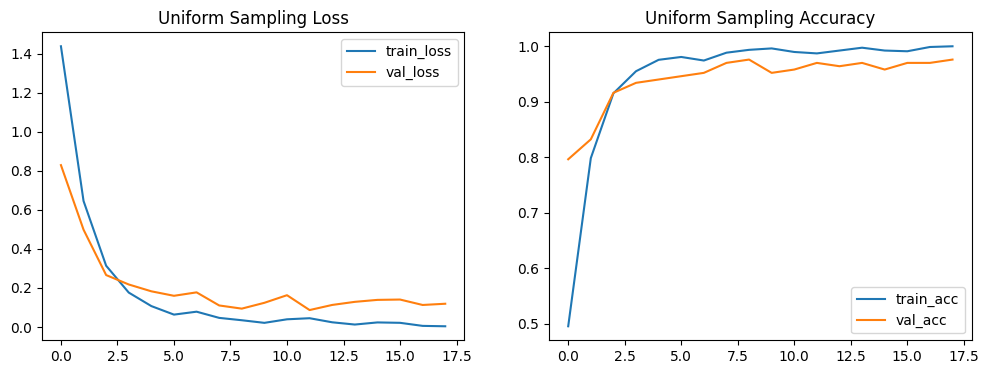

Segment strategy history:


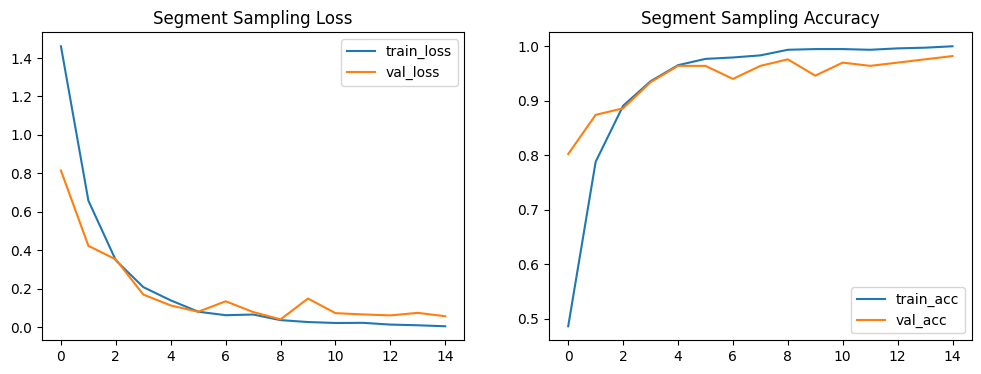

In [40]:
# ----------------------------
# 7) Plot training curves
# ----------------------------
def plot_history(h, title='history'):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(h.history['loss'], label='train_loss')
    plt.plot(h.history['val_loss'], label='val_loss')
    plt.title(f'{title} Loss'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(h.history['accuracy'], label='train_acc')
    plt.plot(h.history['val_accuracy'], label='val_acc')
    plt.title(f'{title} Accuracy'); plt.legend()
    plt.show()

print("Uniform strategy history:")
plot_history(history_u, title='Uniform Sampling')

print("Segment strategy history:")
plot_history(history_s, title='Segment Sampling')

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
=== Classification report for uniform ===
                            precision    recall  f1-score   support

                  Clapping       0.92      1.00      0.96        22
    

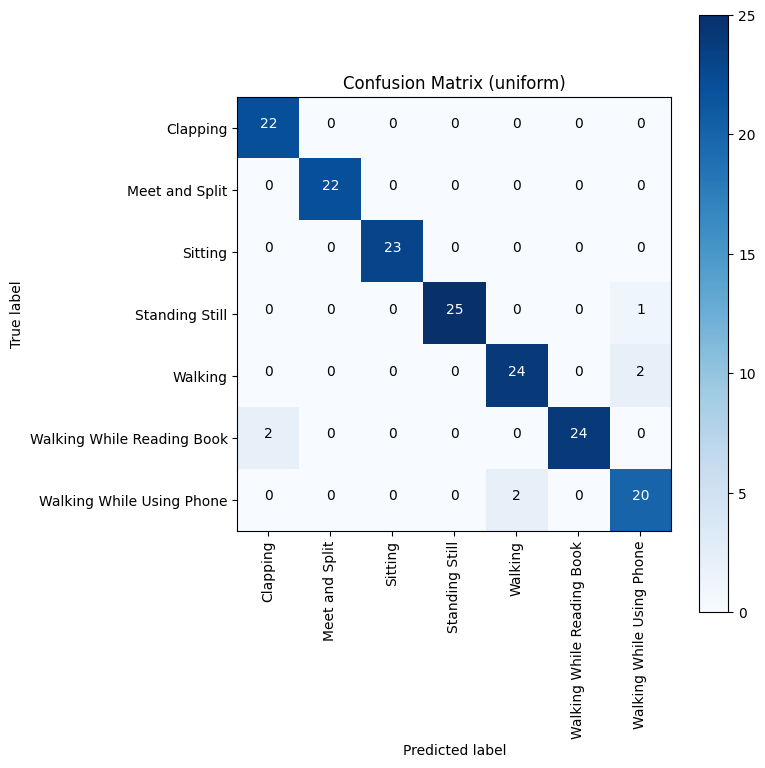

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step
=== Classification report for segment ===
                            precision    recall  f1-score   support

                  Clapping       0.92      1.00      0.96        22
    

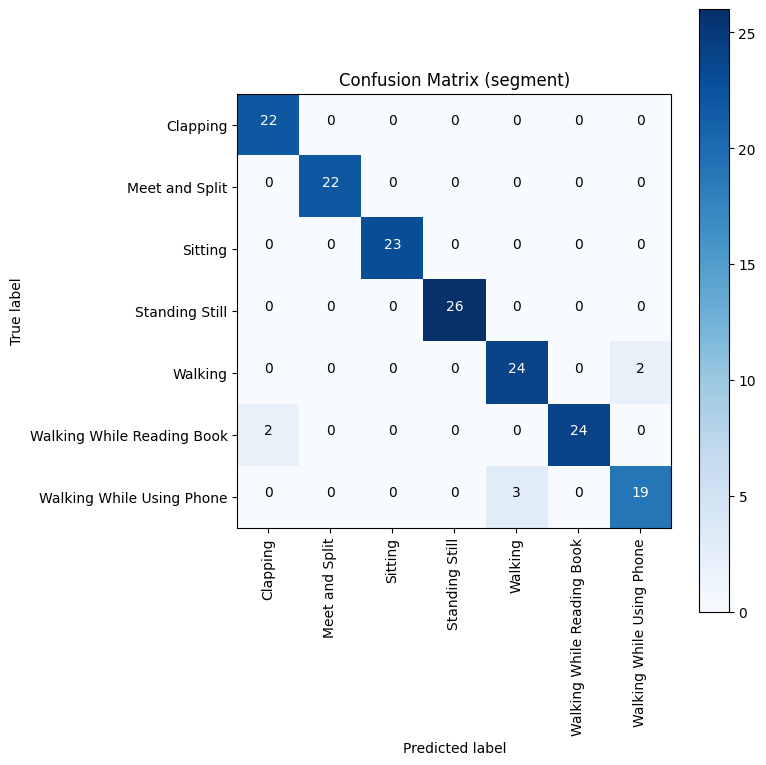

In [41]:
# ----------------------------
# 8) Evaluation on test sets (get confusion matrix + classification report)
# ----------------------------
def evaluate_and_report(model, test_df, test_ds, strategy_name='uniform'):
    # get preds and true labels
    y_true = []
    y_pred = []
    file_list = []
    for batch_clips, batch_labels in test_ds:
        preds = model.predict(batch_clips)
        preds_idx = np.argmax(preds, axis=1)
        y_true.extend(batch_labels.numpy().tolist())
        y_pred.extend(preds_idx.tolist())
        
    # classification report
    print(f"=== Classification report for {strategy_name} ===")
    print(classification_report(y_true, y_pred, target_names=classes))
    
    # confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix ({strategy_name})')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    # annotate
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Evaluate uniform model on uniform test
evaluate_and_report(model_u, test_u, test_ds_u, strategy_name='uniform')

# Evaluate segment model on segment test
evaluate_and_report(model_s, test_s, test_ds_s, strategy_name='segment')

How Testing pipeline works for Video based Data

---

## **Step 0: Setup**

```python
for batch_clips, batch_labels in test_ds:
    preds = model.predict(batch_clips)
```

* `test_ds` is a **tf.data.Dataset** that yields batches of videos.
* `batch_clips` shape: `(B, T, H, W, C)`

  * `B` = batch size
  * `T` = number of frames per clip (e.g., 16)
  * `H, W, C` = height, width, channels of each frame
* `batch_labels` shape: `(B,)` → ground truth labels for each video

**Important:** The **model input is a full sequence of frames**, not individual frames. So **prediction happens on the entire clip at once**, not frame by frame.

---

## **Step 1: Forward pass through the model**

`preds = model.predict(batch_clips)`

* Each video clip `(T frames)` is fed through:

  1. **TimeDistributed CNN** → extracts features **per frame**.

     * Shape change: `(B, T, H, W, C)` → `(B, T, feat_dim)`
     * Each frame is processed individually by the CNN, weights are shared across frames.
  2. **TimeDistributed Dense** → reduces feature dimensionality per frame.

     * Shape: `(B, T, 512)`
  3. **Bidirectional LSTM** → combines features across **time**, outputs a **single vector per video**.

     * Shape: `(B, 512)` (because `return_sequences=False`)
  4. **Dense + Dropout** → final classification layer.

     * Shape: `(B, NUM_CLASSES)` → **probabilities per class** after softmax.

So, **the output `preds` is one prediction vector per video clip**, not per frame.

---

## **Step 2: Convert predictions to class indices**

```python
preds_idx = np.argmax(preds, axis=1)
```

* `preds` is `(B, NUM_CLASSES)` → softmax probabilities.
* `np.argmax` → index of the class with the **highest probability**.
* `preds_idx` is shape `(B,)` → predicted class for each video clip in the batch.

---

## **Step 3: Collect predictions and labels**

```python
y_true.extend(batch_labels.numpy().tolist())
y_pred.extend(preds_idx.tolist())
```

* `y_true` → list of ground-truth labels for all test videos
* `y_pred` → list of predicted labels for all test videos
* This is done **batch by batch** until all videos in the dataset are processed.

---

## **Step 4: Classification report**

```python
print(classification_report(y_true, y_pred, target_names=classes))
```

* Uses **sklearn.metrics.classification_report**
* Computes metrics like **precision, recall, F1-score** for each class
* Input: `y_true` (ground truth) and `y_pred` (model predictions per video)

**Important:** These metrics are **per video**, not per frame.

---

## **Step 5: Confusion matrix**

```python
cm = confusion_matrix(y_true, y_pred)
```

* Creates a **NUM_CLASSES × NUM_CLASSES matrix**

  * Rows → true labels
  * Columns → predicted labels
  * `cm[i,j]` = number of videos with true class `i` predicted as `j`
* Then it is plotted using `plt.imshow` and annotated for visualization.

---

## ✅ **Key points**

1. **Prediction happens per video**, not per frame.

   * TimeDistributed CNN processes **frames individually**, but LSTM aggregates **temporal information** and outputs one prediction per video.
2. **Final predicted class** = class with **highest probability** from the model’s softmax output.
3. **Evaluation metrics** like confusion matrix and classification report are calculated at **video level**.
4. No per-frame voting is done; the LSTM has already “summarized” the sequence.

---


In [42]:
# ----------------------------
# 9) (Optional) Compare both models on same test set
#    - e.g., evaluate both on uniform test or segment test
# ----------------------------
print("Evaluating both models on the UNIFORM test set for direct comparison:")
# get preds for model_u and model_s on test_u
def preds_on_dataset(model, test_ds):
    y_true = []
    y_probs = []
    for batch_clips, batch_labels in test_ds:
        preds = model.predict(batch_clips)
        y_probs.extend(preds.tolist())
        y_true.extend(batch_labels.numpy().tolist())
    return np.array(y_true), np.array(y_probs)

y_true_u, probs_u = preds_on_dataset(model_u, test_ds_u)
y_true_u2, probs_s_on_u = preds_on_dataset(model_s, test_ds_u)

print("Uniform model accuracy on uniform test:", (np.argmax(probs_u,axis=1) == y_true_u).mean())
print("Segment model (trained on segment) accuracy on uniform test:", (np.argmax(probs_s_on_u,axis=1) == y_true_u2).mean())


Evaluating both models on the UNIFORM test set for direct comparison:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms

In [43]:
# Save models and label mapping
model_u.save('model_uniform.h5')
model_s.save('model_segment.h5')
with open('label_map.json','w') as f:
    json.dump(label2idx, f)

print("Done. Models and label map saved.")

Done. Models and label map saved.




---

## 🧩 What is `tf.data.AUTOTUNE`?

`tf.data.AUTOTUNE` is a **special TensorFlow constant** that tells the `tf.data` API to **automatically tune** the number of parallel operations (like data loading, preprocessing, and prefetching) **at runtime** for best performance.

Think of it like saying:

> “TensorFlow — you decide how many CPU threads or buffers to use for this dataset operation to make it run as fast as possible.”

---

## 💡 Where it’s used (and what it means)

You’ll often see `AUTOTUNE` used in three common places in the `tf.data` pipeline:

### 1️⃣ `map(..., num_parallel_calls=tf.data.AUTOTUNE)`

```python
ds = ds.map(tf_npz_loader, num_parallel_calls=tf.data.AUTOTUNE)
```

👉 TensorFlow will automatically choose how many parallel calls to use when applying `tf_npz_loader` to the dataset elements.

✅ This lets TensorFlow read and preprocess multiple `.npz` files **in parallel**, instead of one by one.

---

### 2️⃣ `prefetch(tf.data.AUTOTUNE)`

```python
ds = ds.prefetch(tf.data.AUTOTUNE)
```

👉 TensorFlow will automatically decide **how many batches to prepare ahead of time** (while the GPU is training on the current one).

✅ This overlaps **data loading** on the CPU with **model training** on the GPU → significantly faster training.

---

### 3️⃣ Sometimes used in `interleave`, `shuffle`, or `batch`

(e.g., for multi-file datasets, TensorFlow still auto-tunes parallelism)

---

## ⚙️ What happens behind the scenes

Without `AUTOTUNE`, you’d have to manually specify how many parallel workers to use, like:

```python
ds.map(tf_npz_loader, num_parallel_calls=8)
```

But the “best” number depends on:

* your CPU cores,
* disk I/O speed,
* dataset size,
* preprocessing complexity.

Instead of guessing, `AUTOTUNE` uses TensorFlow’s **runtime profiler** to monitor throughput and automatically pick the optimal value for your system.

---

## 🚀 Why it’s useful

| Benefit                  | Description                                               |
| ------------------------ | --------------------------------------------------------- |
| ⚡ Faster input pipelines | Automatically overlaps CPU data loading with GPU training |
| 🧠 Smarter resource use  | Adapts based on CPU cores, memory, and workload           |
| 💻 No tuning needed      | You don’t have to guess how many workers to use           |
| ✅ Safe default           | Always improves or at least matches manual tuning         |

---

## 🔍 Example comparison

### Without AUTOTUNE:

```python
ds = ds.map(tf_npz_loader)
ds = ds.prefetch(1)
```

→ Loads one batch at a time, waits until finished.

### With AUTOTUNE:

```python
ds = ds.map(tf_npz_loader, num_parallel_calls=tf.data.AUTOTUNE)
ds = ds.prefetch(tf.data.AUTOTUNE)
```

→ Loads and preprocesses **multiple clips in parallel** while the GPU trains on the previous batch.

This can reduce **GPU idle time** and improve **training throughput** by 2× or more, especially for video datasets like yours (since loading `.npz` and decoding frames is relatively heavy).

---

## ✅ TL;DR

| Term               | Meaning                                                         | Purpose                             |
| ------------------ | --------------------------------------------------------------- | ----------------------------------- |
| `tf.data.AUTOTUNE` | Let TensorFlow auto-tune performance settings                   | Optimize parallelism for best speed |
| Common uses        | `map(..., num_parallel_calls=AUTOTUNE)`<br>`prefetch(AUTOTUNE)` | Parallel load & overlap compute     |
| Benefit            | Faster input pipeline, no manual tuning needed                  |                                     |

---

So — in your code:

```python
ds = ds.map(tf_npz_loader, num_parallel_calls=AUTOTUNE)
ds = ds.batch(batch_size).prefetch(AUTOTUNE)
```

means:

> “Load, preprocess, and batch my `.npz` clips in parallel using as many CPU threads and buffers as TensorFlow finds optimal.”

✅ It’s the **recommended best practice** for any TensorFlow data pipeline.
